# The Sparks Foundation
## Graduate Rotational Internship Program

## *Data Science & Business Analytics*
 

### Tasks:- Prediction using Supervised ML 

#### Problem Statement
● Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

● Data can be found at http://bit.ly/w-data

● What will be predicted score if a student studies for 9.25 hrs/ day?

### Supervised  Learning

Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs. 

It infers a function from labeled training data consisting of a set of training examples.

### Simple Linear Regression

Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables.

#### Importing all libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Reading data from url**

In [5]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

#### Lets plot our data on 2D (Scatter Plot)

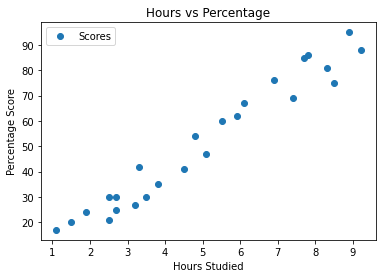

In [13]:
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

### Preparing the Data

#### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [15]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values

#### Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Fitting Simple Linear Regression to the training set

In [20]:
from sklearn.linear_model import LinearRegression

lin = LinearRegression()
training = lin.fit(X_train,y_train)

print("Training Completed")

Training Completed


#### Plotting the regression line

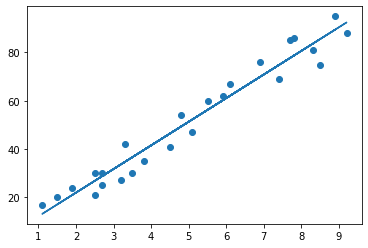

In [21]:
line = lin.coef_*X+lin.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Prediction

In [22]:
yhat=lin.predict(X_test)

### Comparing Actual vs Predicted
 

In [23]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': yhat})  
df1

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


### You can also test with your own data


In [26]:
hours = 9.25
Pred_check = lin.predict(np.array([9.25]).reshape(-1,1))
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(Pred_check[0]))

Number of Hours = 9.25
Predicted Score = 92.91505723477057


### Evaluting The Model

In [34]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat))

Mean Absolute Error: 4.419727808027654


In [31]:
# computing RMSE (root mean squared error)

lin_mse=metrics.mean_squared_error(y_test,yhat)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse)

4.792191274636314


### Calculating R^2

In [32]:
r2_lin_test=training.score(X_test,y_test)
r2_lin_train=training.score(X_train,y_train)

In [33]:
print(r2_lin_test,r2_lin_train)

0.9568211104435258 0.9484997422695115
